In [227]:
import numpy as np

In [228]:
import pandas as pd

In [229]:
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
from sklearn.pipeline import Pipeline

In [231]:
from sklearn.impute import SimpleImputer

In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
from sklearn.preprocessing import OneHotEncoder

In [234]:
from sklearn.compose import ColumnTransformer

In [299]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [236]:
from sklearn.linear_model import LinearRegression

In [237]:
from sklearn.tree import DecisionTreeRegressor

In [238]:
from sklearn.model_selection import cross_val_score

In [239]:
from sklearn.ensemble import RandomForestRegressor

In [240]:
from sklearn.model_selection import GridSearchCV

In [241]:
cal_housing = pd.read_csv('housing.csv')
cal_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [242]:
cal_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [243]:
cal_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [244]:
cal_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B9CA18048>,
      dtype=object)

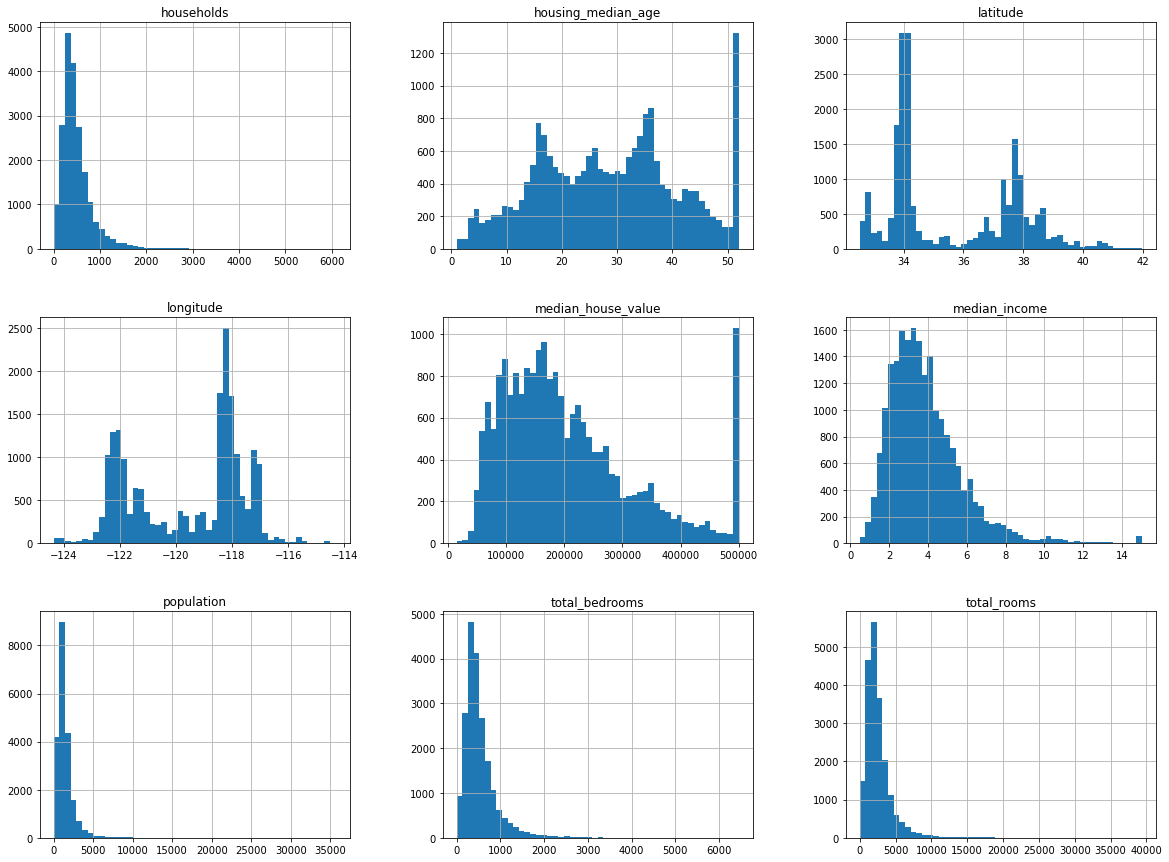

In [245]:
cal_housing.hist(bins=50, figsize=(20,15))

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
train_set, test_set = train_test_split(cal_housing, test_size=0.2, random_state=42)

In [248]:
housing = train_set.copy()

In [249]:
corr_matrix = housing.corr()

In [250]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

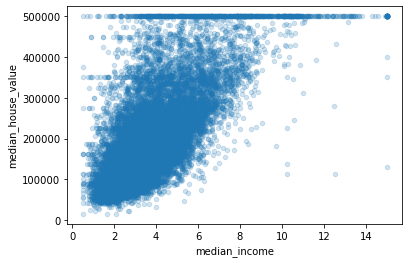

In [251]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2)

In [252]:
cal_housing = train_set.drop('median_house_value', axis=1)
cal_housing_labels = train_set['median_house_value'].copy()

In [253]:
cal_housing_num = cal_housing.drop('ocean_proximity', axis=1)
cal_housing_cat_attrib = cal_housing['ocean_proximity']

In [254]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

cal_housing_num_tr = num_pipeline.fit_transform(cal_housing_num)

In [255]:
num_attribs = list(cal_housing_num)
cat_attribs = ['ocean_proximity']

In [256]:
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [257]:
cal_housing_prepared = full_pipeline.fit_transform(cal_housing)

# TRAINING WITH LINEAR REGRESSION

In [258]:
lin_reg = LinearRegression()

In [259]:
lin_reg.fit(cal_housing_prepared, cal_housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [260]:
cal_housing_predictions = lin_reg.predict(cal_housing_prepared)
lin_mse = mean_squared_error(cal_housing_labels, cal_housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68441.48353829558

In [261]:
some_data = cal_housing.iloc[:5]
some_labels = cal_housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels', list(some_labels))

Predictions: [189312. 290816. 249280. 147520. 166464.]
Labels [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


# TRAINING WITH DECISIONTREE REGRESSOR

In [262]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(cal_housing_prepared, cal_housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [263]:
cal_housing_predictions = tree_reg.predict(cal_housing_prepared)
tree_mse = mean_squared_error(cal_housing_labels, cal_housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [264]:
some_data = cal_housing.iloc[:5]
some_labels = cal_housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', tree_reg.predict(some_data_prepared))
print('Labels', list(some_labels))

Predictions: [103000. 382100. 172600.  93400.  96500.]
Labels [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


# TRAINING WITH  RANDOM FOREST REGRESSOR

In [270]:
forest_reg = RandomForestRegressor()

In [271]:
forest_reg.fit(cal_housing_prepared, cal_housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [272]:
forest_cal_housing_predictions = forest_reg.predict(cal_housing_prepared)
forest_mse = mean_squared_error(cal_housing_labels, forest_cal_housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18114.688394339504

In [293]:
18114.68-100

18014.68

In [274]:
forest_r2_score = r2_score(cal_housing_labels, forest_cal_housing_predictions)
forest_r2_score

0.9754527764792962

In [275]:
forest_mean_absolute_error = mean_absolute_error(cal_housing_labels, forest_cal_housing_predictions)
forest_mean_absolute_error

11656.741859253876

In [279]:
print('PERFORMANCE MEASURES ON RANDOMFOREST REGRESSOR\n')
print('ROOT MEAN SQUARED ERROR:', forest_rmse)
print('R SQUARE:', forest_r2_score)
print('MEAN ABSOLUTE ERROR:', forest_mean_absolute_error)

PERFORMANCE MEASURES ON RANDOMFOREST REGRESSOR

ROOT MEAN SQUARED ERROR: 18114.688394339504
R SQUARE: 0.9754527764792962
MEAN ABSOLUTE ERROR: 11656.741859253876


In [280]:
some_data = cal_housing.iloc[:5]
some_labels = cal_housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', forest_reg.predict(some_data_prepared))
print('Labels', list(some_labels))

Predictions: [108027.   370998.   183633.01  87701.    95390.  ]
Labels [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


# EVALUATING THE MODELS USING CROSS VALIDATION

In [283]:
lin_scores = cross_val_score(lin_reg, cal_housing_prepared, cal_housing_labels,
                        scoring = 'neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [284]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean', scores.mean())
    print('Standard Deviation', scores.std())

display_scores(lin_rmse_scores)

Scores: [65585.35022002 71711.35784404 68143.02388491 66871.26865985
 69438.15610105 65640.36503235 65826.13681686 69890.06861719
 73184.31524094 69704.17693297]
Mean 68599.42193501796
Standard Deviation 2510.412088066752


In [285]:
tree_scores = cross_val_score(tree_reg, cal_housing_prepared, cal_housing_labels,
                        scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [286]:
display_scores(tree_rmse_scores)

Scores: [65878.38146426 68003.8233946  67435.62442231 72711.96205469
 67773.97918393 67409.20458058 63432.19736779 71491.29756002
 67173.0514302  68860.80250524]
Mean 68017.03239636187
Standard Deviation 2487.9391887301213


In [287]:
forest_scores = cross_val_score(forest_reg, cal_housing_prepared, cal_housing_labels,
                        scoring = 'neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [288]:
display_scores(forest_rmse_scores)

Scores: [46642.92642011 50547.82024143 47786.82811072 50611.84667044
 50253.26832369 47027.37546695 45444.35582109 51007.91084255
 49362.99129228 50096.39925578]
Mean 48878.17224450504
Standard Deviation 1879.9748292775666


In [291]:
param_grid = [
{'n_estimators': [3, 10, 30, 60], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [2, 10,], 'max_features': [2, 3, 4]},
]

In [292]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(cal_housing_prepared, cal_housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [300]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 60}

In [301]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [306]:
grid_search_predictions = grid_search.predict(some_data_prepared)

In [307]:
grid_search_predictions

array([111683.33333333, 370986.66666667, 184158.33333333,  91765.        ,
        97906.66666667])

In [303]:
print(some_labels)

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64


In [309]:
grid_search_r2_score = r2_score(some_labels, grid_search_predictions)
grid_search_r2_score

0.99445022442968

In [310]:
grid_search_prediction1 = grid_search.predict(cal_housing_prepared)

In [311]:
grid_search_r2_score1 = r2_score(cal_housing_labels, grid_search_prediction1)
grid_search_r2_score1

0.9751627985360691

# FITTING THE MODEL ON THE TEST SET

In [312]:
final_model = grid_search.best_estimator_

In [313]:
X_test = test_set.drop('median_house_value', axis=1)
y_test_labels = test_set['median_house_value'].copy()

In [314]:
X_test_prepared = full_pipeline.transform(X_test)

In [315]:
final_predictions = final_model.predict(X_test_prepared)

In [316]:
final_mse = mean_squared_error(y_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [317]:
final_rmse

48679.028267025955

In [318]:
final_r2_score = r2_score(y_test_labels, final_predictions)
final_r2_score

0.8191673109411277